# 10.4 Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
states = pd.read_csv('USArrests.csv')
states.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
states.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
states.loc[:,['Murder','Assault','UrbanPop','Rape']].apply(lambda x: x.var())

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

As can be seen the variables have vastly different means and variances so it is important to scale them to a mean of 0 and a standard deviation of 1 so that (in this case) assault doesnt drive the principal components

In [5]:
#scaling the data

#importing scale() which will scale to a mean of 0 and an std dev of 1 by default
from sklearn.preprocessing import scale

#creating new, scaled df
statesNoLabel = states.loc[:,['Murder','Assault','UrbanPop','Rape']]
X = pd.DataFrame(scale(statesNoLabel), index=statesNoLabel.index, columns=statesNoLabel.columns)

In [6]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [7]:
#importing PCA from scikit-learn
from sklearn.decomposition import PCA

In [8]:
#getting PCA loadings
pca = PCA()
usarrests_loadings = pd.DataFrame(pca.fit(X).components_.T, index=statesNoLabel.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_loadings)
usarrests_loadings.to_clipboard()

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


### note that above there are 4 distinct principal components, this is because in general there are $min(n-1,p)$ informative principal components in a data set with $n$ observations and $p$ variables

In [9]:
np.array(states.iloc[:,0])

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [10]:
#getting pca scores for each observation
usarrests_score = pd.DataFrame(pca.fit_transform(X), index = np.array(states.iloc[:,0]), columns=['PC1','PC2','PC3','PC4'])
display(usarrests_score)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


### plotting the biplot

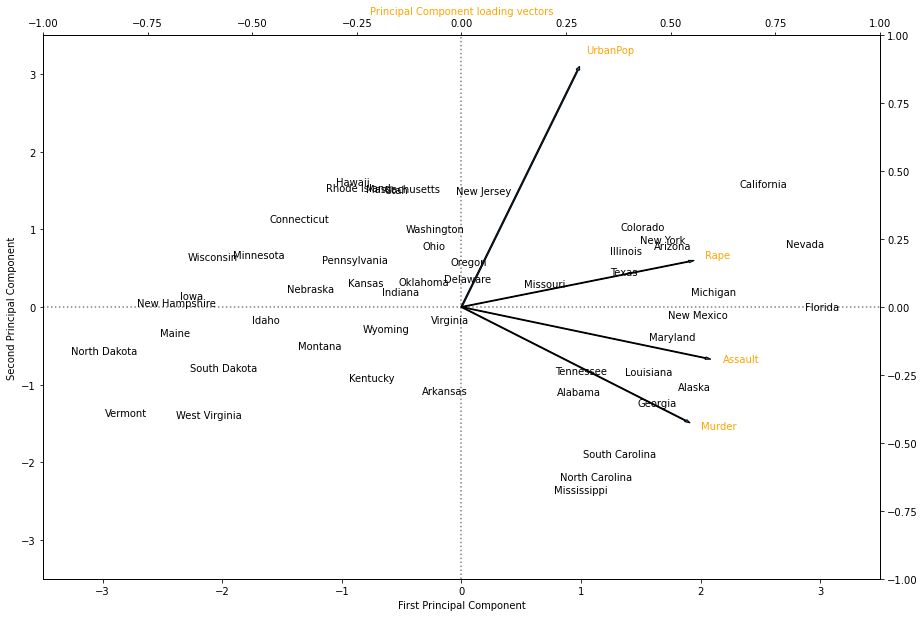

In [11]:
#setting the size
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
#annotate is for plotting text, first arg is text, second in parens is coordinates(x,y)
for i in usarrests_score.index:
    ax1.annotate(i, (usarrests_score.PC1.loc[i],-usarrests_score.PC2.loc[i]), ha='center')
    
#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')

#setting axes labels
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in usarrests_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(usarrests_loadings.PC1.loc[i]*a,-usarrests_loadings.PC2.loc[i]*a),color='orange')
    
#plot vectors
ax2.arrow(0,0,usarrests_loadings.PC1[0], -usarrests_loadings.PC2[0], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[1], -usarrests_loadings.PC2[1], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[2], -usarrests_loadings.PC2[2], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[3], -usarrests_loadings.PC2[3], width=0.003);

In [12]:
#the proportion of variance explained by each PC
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [13]:
#getting the cumulative proportion of variance explained by each PC
np.cumsum(pca.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

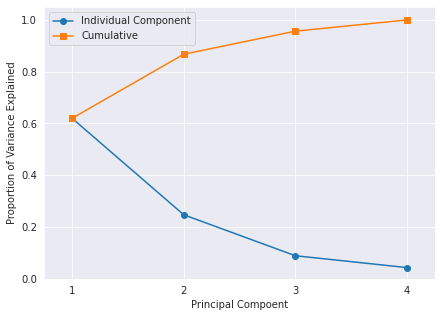

In [14]:
#plt style
sns.set_style('darkgrid')
#plotting a scree plot
plt.figure(figsize=(7,5))

#plotting individual component variance explained
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label="Individual Component")
#plotting cumulative components variance explained
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_),'-s', label='Cumulative')

#setting labels
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Compoent')
#setting x and y axis limits
plt.xlim(0.75, 4.25)
plt.ylim(0,1.05)
#setting tick marks
plt.xticks([1,2,3,4])
#showing legend
plt.legend(loc=2);


## 10.5.1 K-means Clustering

In [2]:
#importing the k-means package
from sklearn.cluster import KMeans

In [3]:
#generate data
np.random.seed(2)
X= np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [4]:
X

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761],
       [ 3.55145404, -1.70779199],
       [ 3.04153939, -5.11792545],
       [ 3.53905832, -4.5961597 ],
       [ 2.9808695 , -2.82499878],
       [ 2.25212905, -3.99097475],
       [ 2.12189211, -4.15643417],
       [ 3.25657045, -4.98877905],
       [ 2.66117803, -4.23618403],
       [ 2.36234499, -5.18761229],
       [ 1.57878277, -4.1534952 ],
       [ 2.73094304, -1.76863321],
       [ 0.56523242, -3.8872735 ],
       [ 3.37044454, -2.64036614],
       [ 3.50185721, -4.8442137 ],
       [ 3.00000976, -3.45764743],
       [ 2.6864918 , -3.22898826],
       [ 1.13190935, -2.26881533],
       [ 4.46767801, -4.33567734],
       [ 3.61134078, -3.95202941],
       [ 2.17086471, -3.91228978],
       [ 1.00036589, -0.38109252],
       [-0.37566942, -0.07447076],
       [ 0.43349633,  1.27837923],
       [-0.63467931,

### K = 2

In [5]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [6]:
#assignement labels of the clusters
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

Text(0.5, 1.0, 'k=2 cluster')

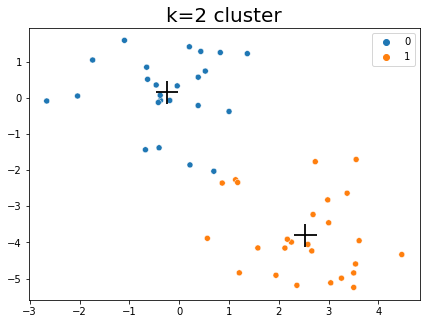

In [7]:
#plotting first cluster model
plt.figure(figsize=(7,5))
sns.scatterplot(x=X[:,0],y=X[:,1], hue=km1.labels_)
sns.scatterplot(x=km1.cluster_centers_[:,0],y=km1.cluster_centers_[:,1],
                hue=range(2),s=500, marker='+',ec='black', legend=False)
plt.title("k=2 cluster", fontsize=20)

### k=3

In [8]:
np.random.seed(4)
km2 =KMeans(n_clusters=3,n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [9]:
pd.Series(km2.labels_).value_counts()

2    21
1    20
0     9
dtype: int64

In [10]:
km2.cluster_centers_

array([[ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797]])

In [11]:
km2.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [12]:
km2.inertia_

68.97379200939724

In [13]:
km2.n_iter_

3

<AxesSubplot:title={'center':'k=3'}>

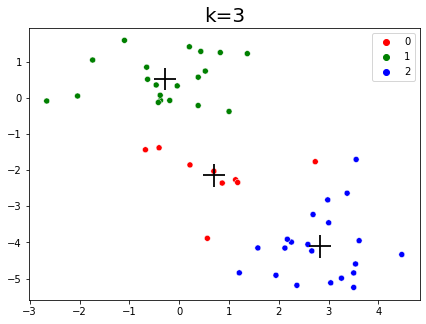

In [14]:
#plotting k=3
colors = ['red','green','blue']
plt.figure(figsize = (7,5))
plt.title("k=3", fontsize=20)
sns.scatterplot(x=X[:,0],y=X[:,1], hue=km2.labels_, palette=colors)
sns.scatterplot(x=km2.cluster_centers_[:,0],y=km2.cluster_centers_[:,1],
                hue=range(3),s=500, marker='+',ec='black', legend=False)

Text(0.5, 1.0, 'k=3')

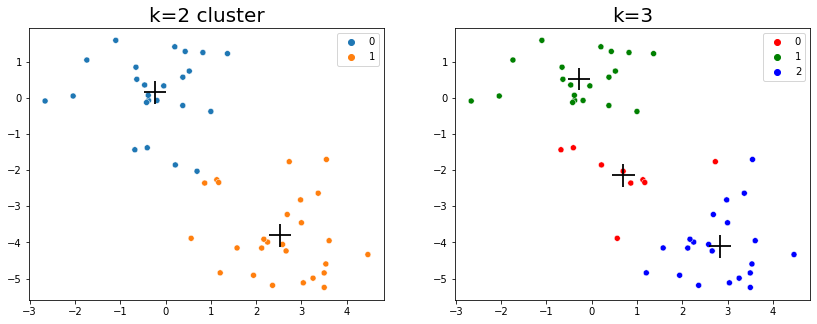

In [15]:
#plotting the two side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(14,5) )

#kmeans = 2
ax1 = sns.scatterplot(x=X[:,0],y=X[:,1], hue=km1.labels_, ax=ax1)
ax1 = sns.scatterplot(x=km1.cluster_centers_[:,0],y=km1.cluster_centers_[:,1],
                hue=range(2),s=500, marker='+',ec='black', legend=False, ax= ax1)
ax1.set_title("k=2 cluster", fontsize=20)


#kmeans = 3
colors = ['red','green','blue']
ax2=sns.scatterplot(x=X[:,0],y=X[:,1], hue=km2.labels_, palette=colors, ax=ax2)
ax2=sns.scatterplot(x=km2.cluster_centers_[:,0],y=km2.cluster_centers_[:,1],
                hue=range(3),s=500, marker='+',ec='black', legend=False, ax=ax2)
ax2.set_title("k=3", fontsize=20)

Some notes on clustering: assigning n_init > 1 within the kmeans function will cause the model to run with multiple initial clusters/multiple initial random assignments.  the rule of thumb is that a high number is better (such as 20 to 50).  We want to minimize the total summ of squares distance from centroid to each observation and a higher n_init should let us do this.  We can evaluate the difference below 

In [16]:
np.random.seed(3)
km3 =KMeans(n_clusters=3,n_init=1)
km3.fit(X)
print(km3.inertia_)

km4 =KMeans(n_clusters=3,n_init=20)
km4.fit(X)
print(km4.inertia_)

km5 =KMeans(n_clusters=3,n_init=50)
km5.fit(X)
print(km5.inertia_)

85.13094798940935
68.97379200939724
68.97379200939724


after a certain point the total sum of squares levels out

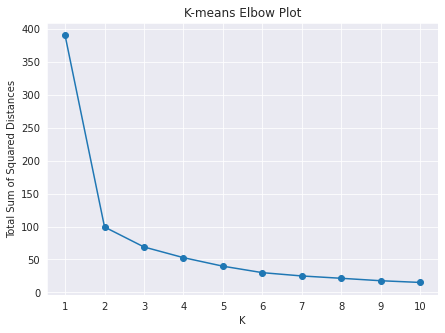

In [17]:
def elbowPlot(data, k, n_start):
    #initialize lists
    inertiaList = []
    kList = [i for i in range(1,k+1)]
    for i in kList:
        model = KMeans(n_clusters= i, n_init=n_start)
        model.fit(data)
        inertiaList.append(model.inertia_)
    #plotting
    sns.set_style('darkgrid')
    plt.figure(figsize=(7,5))
    plt.plot(kList,inertiaList,'-o')
    plt.ylabel('Total Sum of Squared Distances')
    plt.xlabel('K')
    plt.xticks(kList)
    plt.title("K-means Elbow Plot")
    plt.show()
    
elbowPlot(X,10,20)

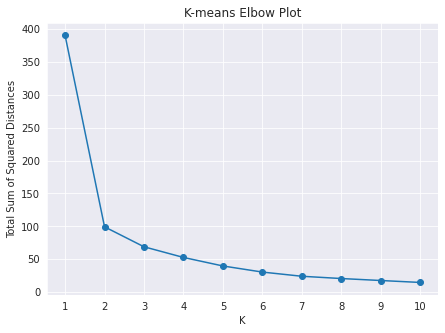

In [18]:
elbowPlot(X,10,50)

## 10.5.2 Hierarchical Clustering

In [20]:
#import the hierarchical clustering package
from scipy.cluster import hierarchy

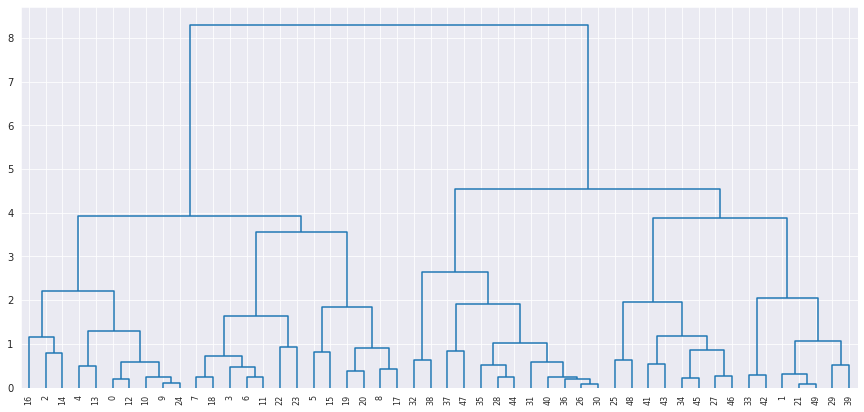

In [29]:
#complete linkage
plt.figure(figsize=(15,7))
compHierarchy = hierarchy.complete(X)
hierarchy.dendrogram(compHierarchy, color_threshold=0)
plt.show()

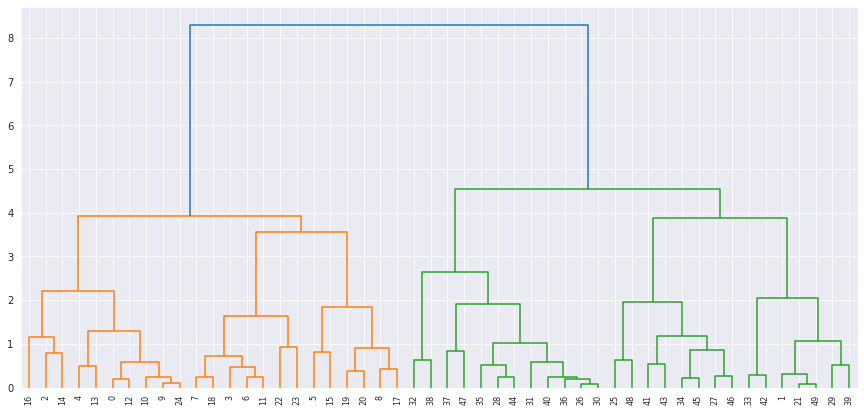

In [26]:
plt.figure(figsize=(15,7))
hierarchy.dendrogram(hierarchy.complete(X))
plt.show()

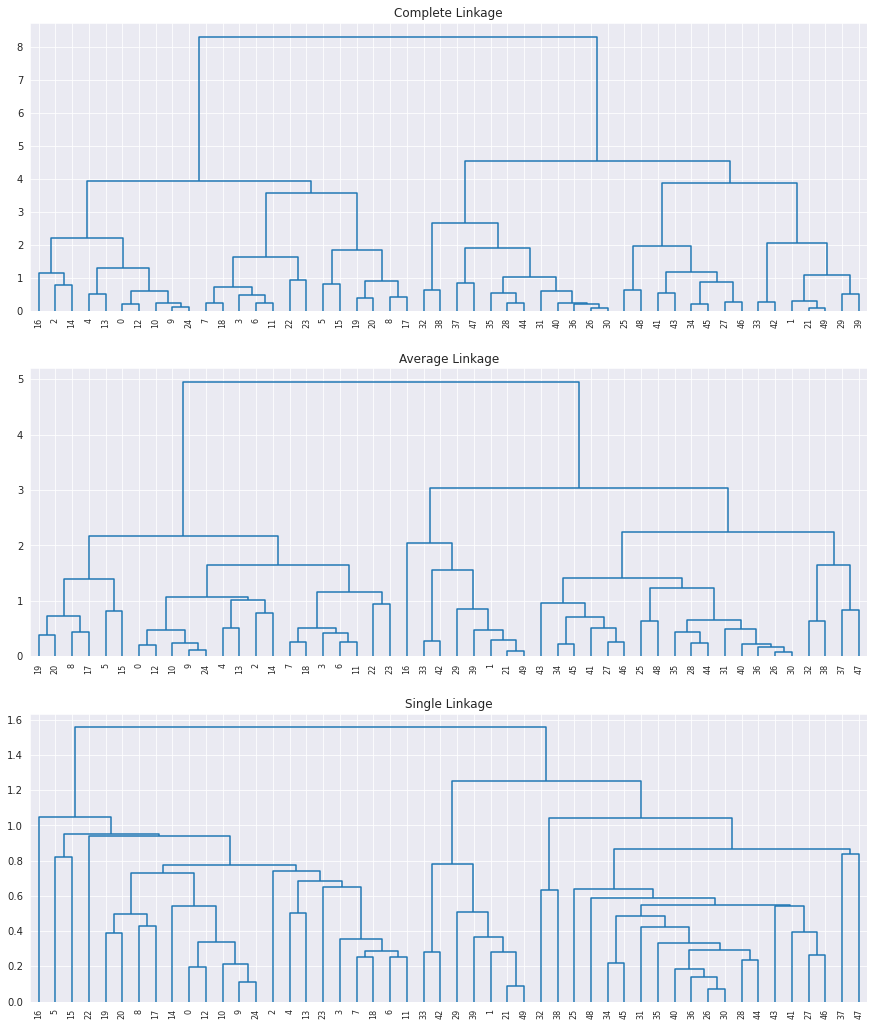

In [32]:
#plotting different linkages all at once
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,18))
for linkage, cluster, ax in zip(
    [hierarchy.complete(X),hierarchy.average(X), hierarchy.single(X)],
    ['c1','c2','c3'],
    [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
    
ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

In [53]:
hierarchy.cut_tree(hierarchy.complete(X),n_clusters=2)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [45]:
hierarchy.cut_tree(hierarchy.complete(X),height=6)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

The above two different ways to cut a tree are equal

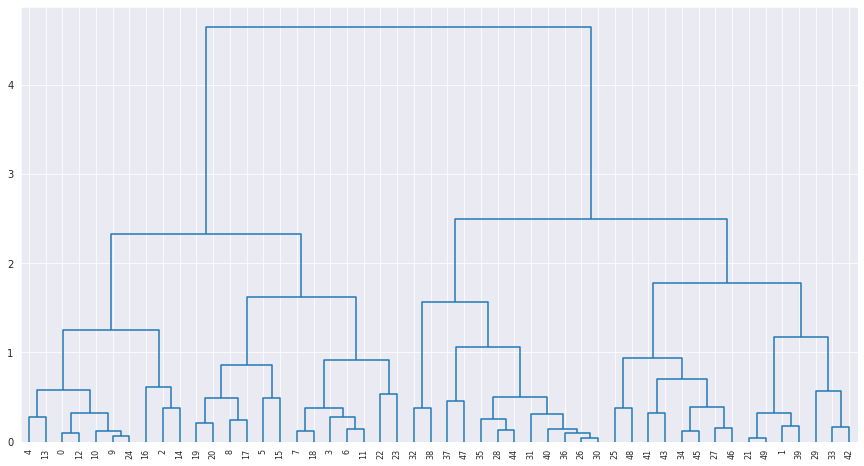

In [47]:
#trying complete linkage with scaled data
from sklearn.preprocessing import scale
xSc = scale(X)
plt.figure(figsize = (15,8))
hierarchy.dendrogram(hierarchy.complete(xSc), color_threshold=0)
plt.show()

In [48]:
#trying to specify dissimilarity measure
from scipy.spatial import distance

In [49]:
Xeucl = distance.pdist(X, 'euclidean')

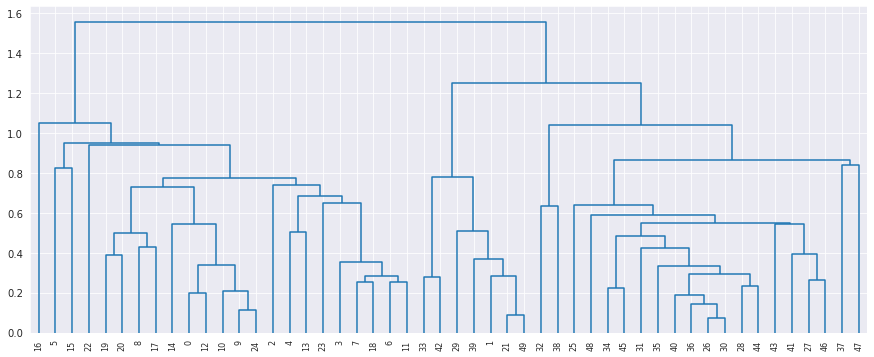

In [50]:
plt.figure(figsize = (15,6))
hierarchy.dendrogram(hierarchy.single(X), color_threshold=0)
plt.show()

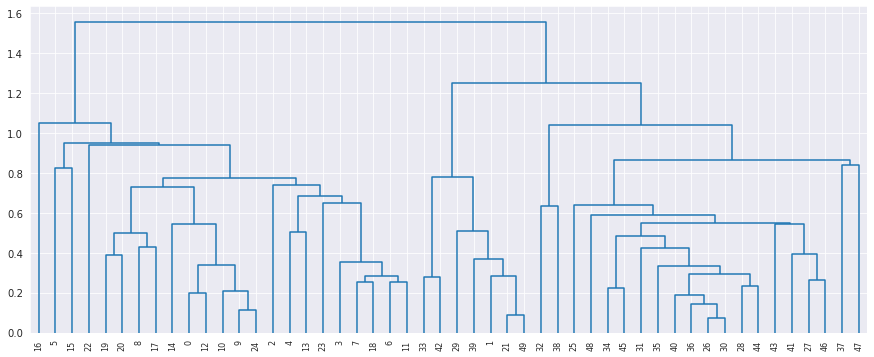

In [51]:
plt.figure(figsize = (15,6))
hierarchy.dendrogram(hierarchy.single(Xeucl), color_threshold=0)
plt.show()

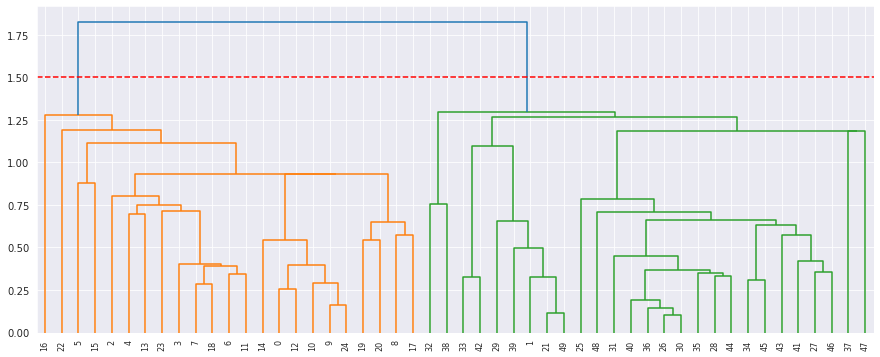

In [67]:
#trying manhattan
Xman = distance.pdist(X, 'cityblock')
plt.figure(figsize = (15,6))
hierarchy.dendrogram(hierarchy.single(Xman), color_threshold=1.5)
plt.axhline(1.5,linestyle='dashed',color='r')
plt.show()

## Lab 10.6 NCI60 Data Example

In [7]:
NCIX = pd.read_csv('NCI60_X.csv')
NCIY = pd.read_csv('NCI60_y.csv')

In [8]:
NCIX.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [9]:
NCIY.head()

,Unnamed: 0,x
0,1,CNS
1,2,CNS
2,3,CNS
3,4,RENAL
4,5,BREAST


In [13]:
NCIX.

AttributeError: 'DataFrame' object has no attribute 'rows'

In [24]:
# Use rpy2 for loading R datasets
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import data as rdata
from rpy2.robjects import pandas2ri


In [25]:
utils =importr('utils')
utils.install_packages('ISLR')

R[write to console]: Installing package into ‘/home/jordan/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ISLR_1.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1757568 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

<rpy2.rinterface_lib.sexp.NULLType object at 0x7ff64286a500> [RTYPES.NILSXP]

In [26]:
# NCI60 dataset is in R ISLR package
islr = importr('ISLR')
nci60_rdf = rdata(islr).fetch('NCI60')['NCI60']
list(nci60_rdf.names)

['data', 'labs']

In [31]:
from sklearn.preprocessing import scale

In [32]:
nci60_labs = pd.DataFrame(pandas2ri.rpy2py(nci60_rdf[1]))
nci60_data = pd.DataFrame(scale(pandas2ri.rpy2py(nci60_rdf[0])), index=nci60_labs[0])
display(nci60_data.head(5))
display(nci60_labs.head(5))

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,,,,,,,,,,,,,,,,,,,,,
CNS,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
CNS,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
CNS,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
RENAL,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
BREAST,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


,0
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [33]:
nci60_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, CNS to MELANOMA
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3+ MB


In [49]:
nci60_labs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       64 non-null     object
dtypes: object(1)
memory usage: 640.0+ bytes


In [36]:
nci60_labs[0].value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
UNKNOWN        1
MCF7D-repro    1
K562B-repro    1
MCF7A-repro    1
Name: 0, dtype: int64

In [37]:
#PCA
#importing PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
#fit_transform fits and transforms (scales) the data all at once
nci60_pca = pd.DataFrame(pca.fit_transform(nci60_data))

In [41]:
#creating a color index for each of the cell types

#factorize converts a categorical datatype into numerical levels
#with the dataset and the associated original categorical variables
#index by 0 to just get factorized data
color_index = pd.factorize(nci60_labs[0])[0]

In [43]:
colormap = plt.cm.hsv

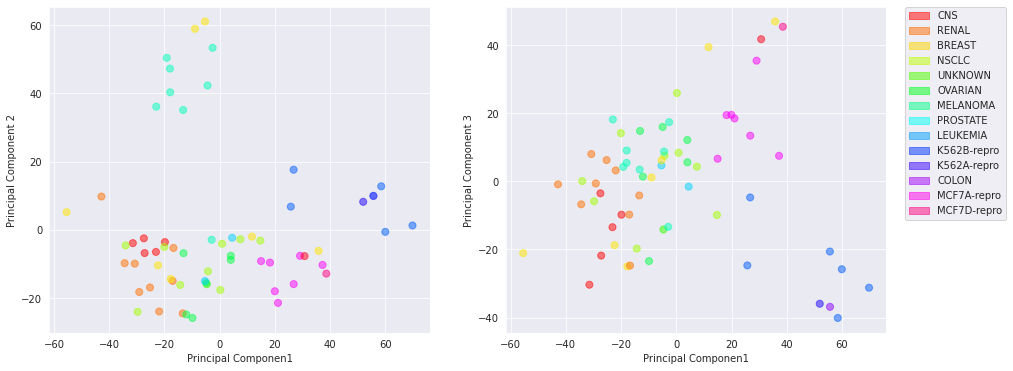

In [56]:
sns.set_style('darkgrid')
#plot the principal components
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

#left plot
ax1.scatter(nci60_pca.iloc[:,0], nci60_pca.iloc[:,1], c=color_index, 
            cmap =colormap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

#right plot
ax2.scatter(nci60_pca.iloc[:,0], nci60_pca.iloc[:,2], c=color_index, 
            cmap =colormap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

#xlabel for both
for ax in fig.axes:
    ax.set_xlabel('Principal Componen1')
    
#creating legend
handles = []
#factorizes only the unique values of nci60_labs
labels = pd.factorize(nci60_labs[0].unique())

import matplotlib as mpl
#normalizes colors across the 14 cell types
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=colormap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

In [65]:
#creating a summary output of PCA
pd.DataFrame([nci60_pca.iloc[:,:5].std(axis=0, ddof=0).values,
             pca.explained_variance_ratio_[:5],
             np.cumsum(pca.explained_variance_ratio_[:5])],
            index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


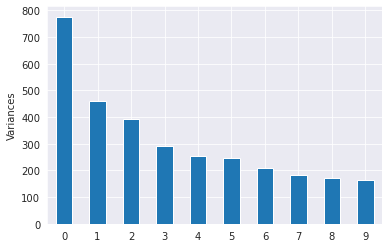

In [66]:
#variances of the principal components
nci60_pca.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

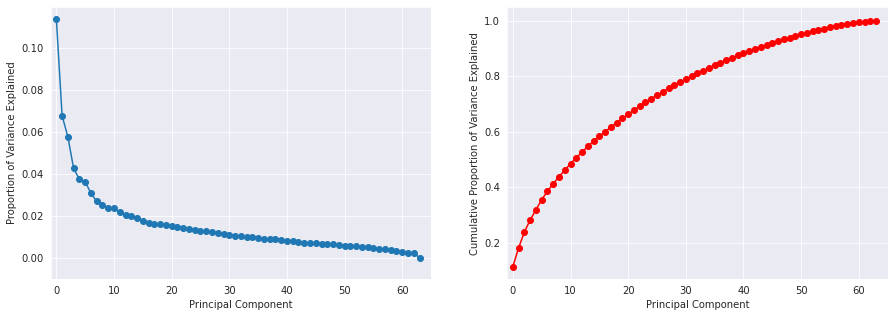

In [67]:
#scree plot

# scree plot
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)

## Lab 10.6.2 Cluster

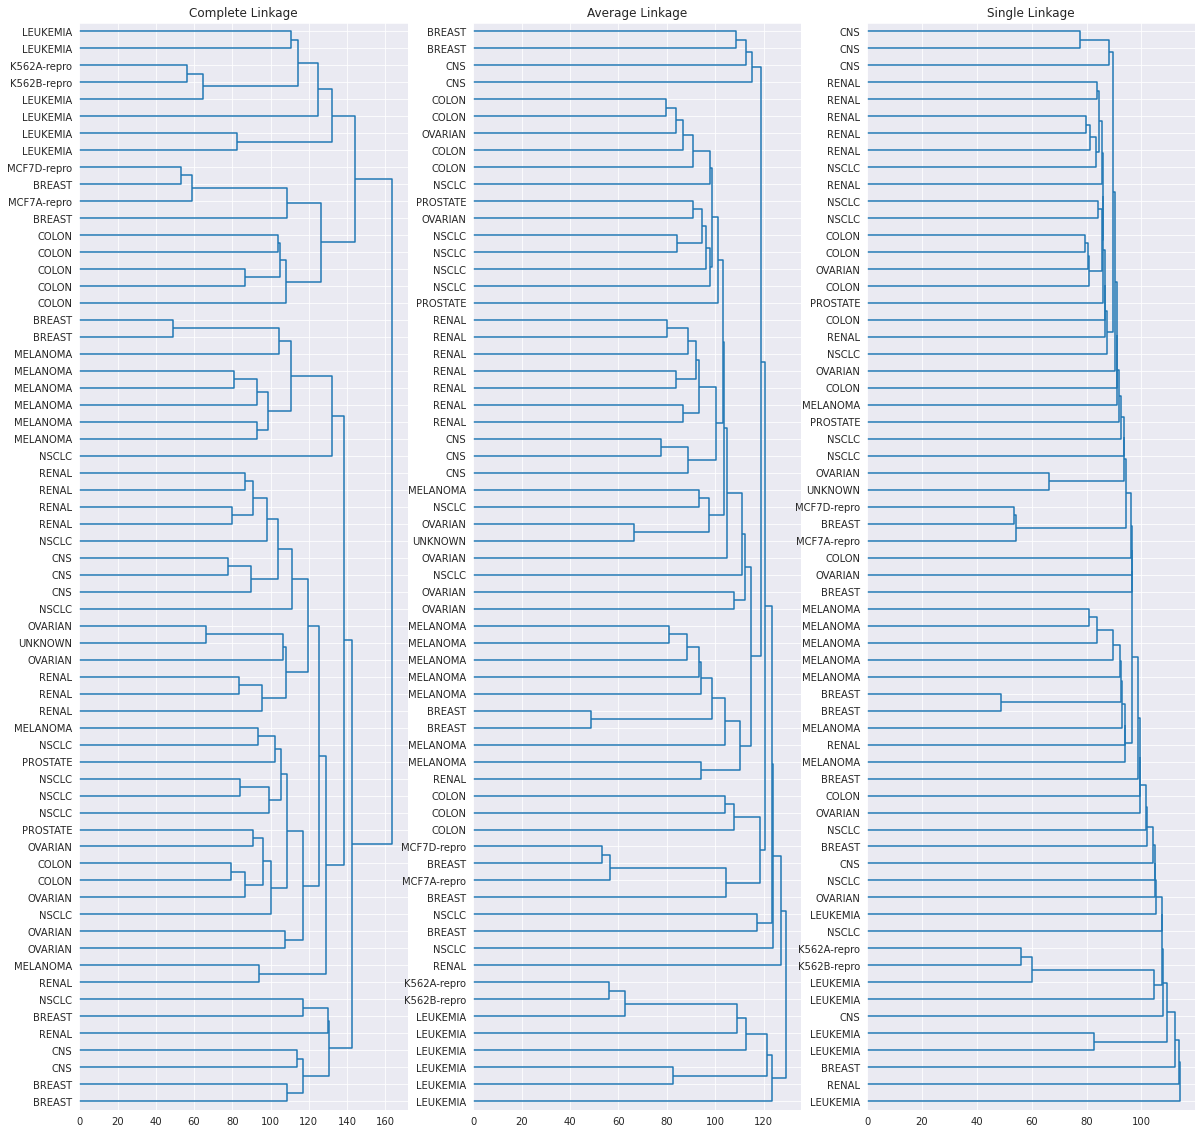

In [69]:
from scipy.cluster import hierarchy
# dendrogram
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(nci60_data), hierarchy.average(nci60_data), hierarchy.single(nci60_data)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=nci60_data.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

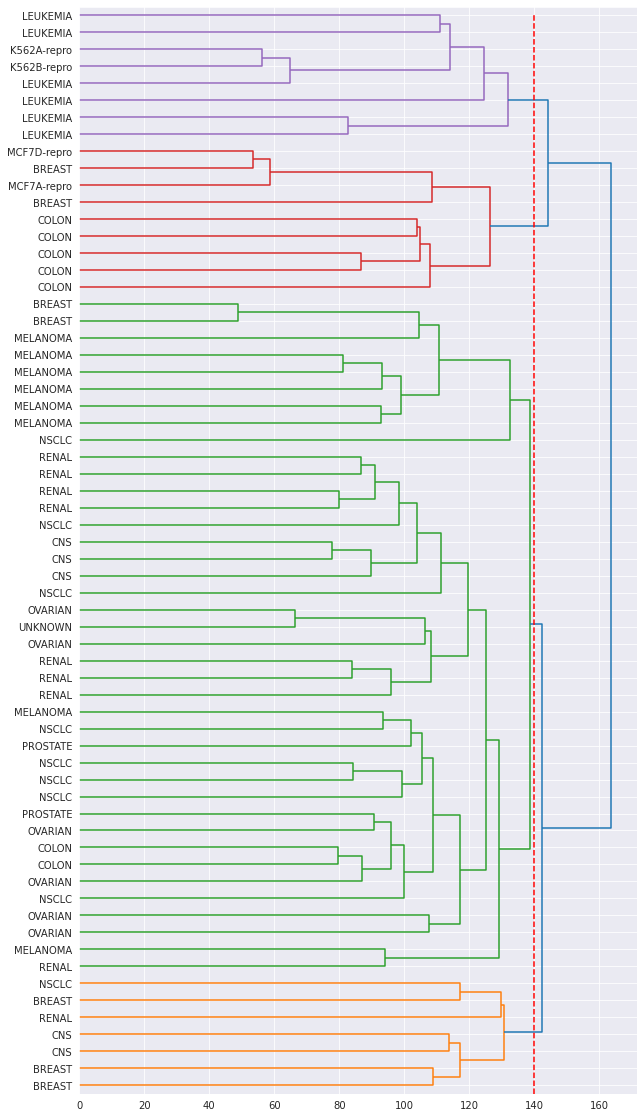

In [70]:
# Cut dendrogram with complete linkage
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(nci60_data),
                            labels=nci60_data.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

In [73]:
#K means clustering
#importing the k-means package
from sklearn.cluster import KMeans
np.random.seed(2)
km_nci60 = KMeans(n_clusters=4, n_init=50)
km_nci60.fit(nci60_data)

KMeans(n_clusters=4, n_init=50)

In [74]:
km_nci60.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [75]:
# Observations per KMeans cluster
pd.Series(km_nci60.labels_).value_counts().sort_index()

0    11
1     9
2     9
3    35
dtype: int64

#### Hierarchical

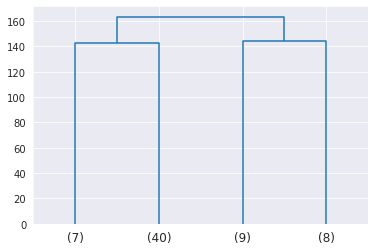

In [77]:
# Observations (leaf counts) per Hierarchical cluster at cut of 4 clusters
nci60_cut = hierarchy.dendrogram(hierarchy.complete(nci60_data), truncate_mode='lastp', p=4, show_leaf_counts=True)

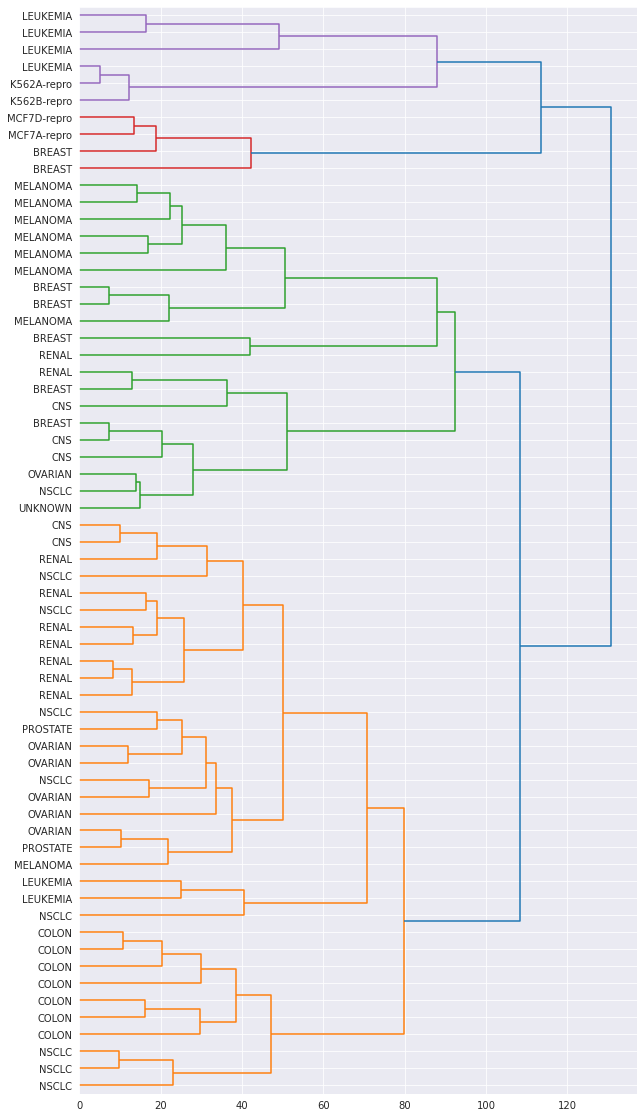

In [78]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(nci60_pca.iloc[:,:5]), labels=nci60_labs[0].values, orientation='right', color_threshold=100, leaf_font_size=10)


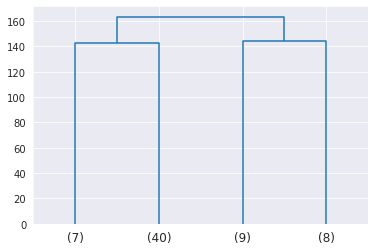

In [79]:
hierarchy.dendrogram(hierarchy.complete(nci60_pca), truncate_mode='lastp', p=4,
                     show_leaf_counts=True);